In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import sklearn.manifold
import sklearn.datasets
import sklearn.cluster
#Voy a manejar un dataset con imagenes correspondientes a dígitos en lenguaje de señas particionado en carpetas de
#acuerdo al dígito correspondiente
files_val = glob.glob('./Dataset/*/*.JPG')
datos=len(files_val)
siz=30
Data=np.zeros((datos,siz*siz*3))
target=np.zeros(datos)
count=0
images=[]

In [2]:
#Leo los datos por carpetas y asigno el target correspondiente
for i in range(10):
    files_val = glob.glob('./Dataset/'+str(i)+'/*.JPG')
    for names in files_val:
        im=Image.open(names)
        out=im.resize((siz,siz))
        images.append(out)
        Data[count,:]=(np.array(out).reshape((-1,1)).T).astype(float)
        target[count]=i
        count=count+1

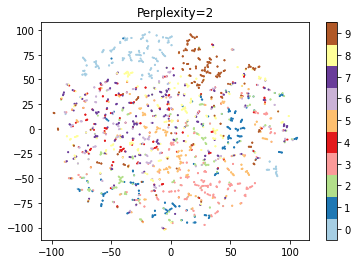

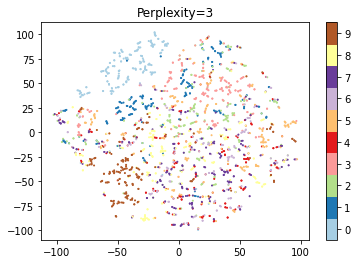

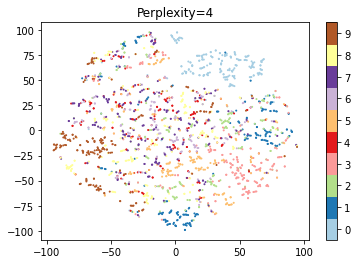

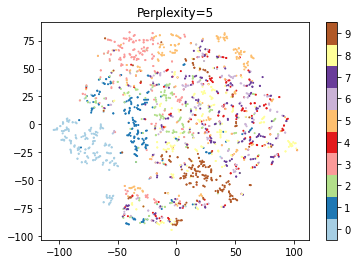

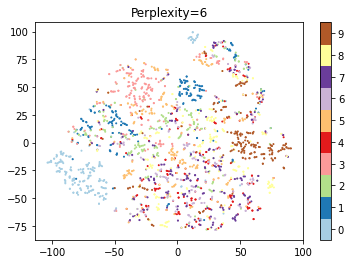

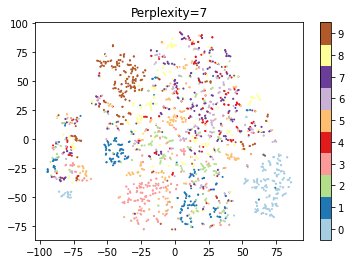

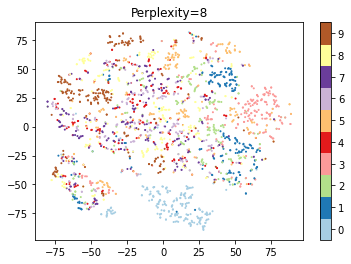

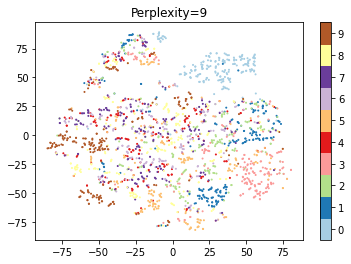

In [3]:
#Pruebo con diferentes valores de perplexity (Toma alrededor de 3 minutos). 
#Los tomo bajos ya que con otras exploraciones he visto que no hay mejoría con valores mas altos
for per in np.arange(2,10,1):
    tsne = sklearn.manifold.TSNE(perplexity=per)
    tsne.fit(Data)
    embedding = tsne.embedding_
    plt.figure()
    plt.title("Perplexity="+str(per))
    plt.scatter(embedding[:,0], embedding[:,1], c=target, cmap='Paired', s=1.0)
    plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
    plt.show()

[t-SNE] Computing 25 nearest neighbors...
[t-SNE] Indexed 2059 samples in 0.668s...
[t-SNE] Computed neighbors for 2059 samples in 34.060s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2059
[t-SNE] Computed conditional probabilities for sample 2000 / 2059
[t-SNE] Computed conditional probabilities for sample 2059 / 2059
[t-SNE] Mean sigma: 394.592571
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.354279
[t-SNE] KL divergence after 1000 iterations: 1.633866


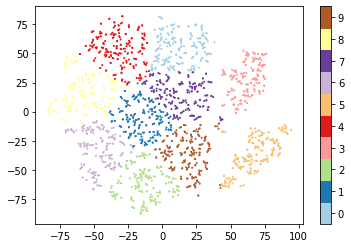

In [4]:
#Realizo KMeans con el mejor valor obtenido de perplexity que parece ser 8
mejorp=8
tsne = sklearn.manifold.TSNE(perplexity=mejorp)
tsne.fit(Data)
embedding = tsne.embedding_
n_clusters = 10
k_means = sklearn.cluster.KMeans(n_clusters=n_clusters)
k_means.fit(embedding) # training
cluster = k_means.predict(embedding) # predice a cual cluster corresponde cada elmento
distance = k_means.transform(embedding)
plt.scatter(embedding[:,0], embedding[:,1], c=cluster, cmap='Paired', s=1.0)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

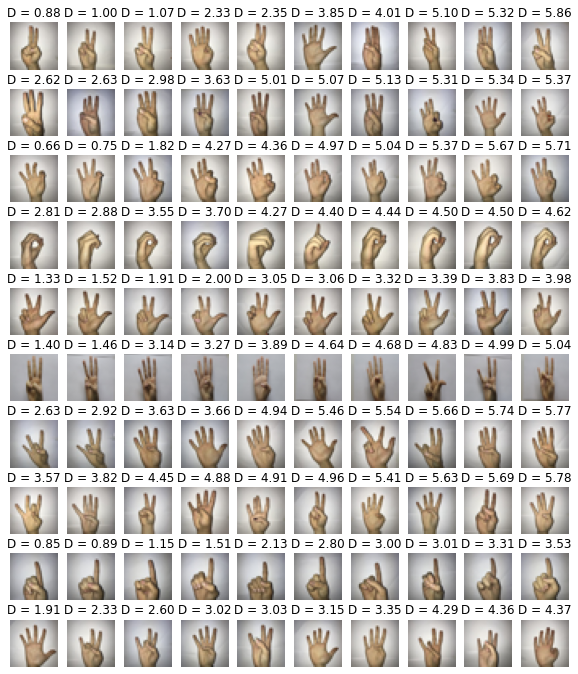

In [5]:
#Realizo la gráfica de los elementos mas cercanos al centro de cada cluster
plt.figure(figsize=(10,12))
for i in range(n_clusters):
    ii = np.argsort(distance[:,i]) # es el orden de los objetos de menor a mayor a la distancia de su cluster
    n_seq = 10
    for l, ind in enumerate(ii[:n_seq]):
        plt.subplot(n_clusters,n_seq,i*n_seq +l +1)
        plt.imshow(images[ind])
        plt.title("D = {:.2f}".format(distance[ind,i]))
        plt.axis('off')
    plt.savefig("Dedos.png")

In [ ]:
#Se observa que realiza "Buenas" clasificaciones de los simbolos correspondientes al 0,1,5 y 9.
#También se observa una franja con un contraste diferente lo que afecta a las imagenes.
#Como hay muchas señas con 3 dedos levantados al algoritmo le cuesta diferenciar unos casos de otros.